In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 60)
import math
import csv
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context(font_scale=2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
import warnings
import scipy
# Ignore all warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

#test lazy classifier
from lazypredict.Supervised import LazyClassifier


# Exploration of Data

## General Information

The problem of classification of Forest Cover Type is composed of 56 features, one of them is the "target_feature" and another one is an irrelevant feature which is "Id".

**Information of each attribute:**

   - Elevation, quantitative (meters): Elevation in meters
   - Aspect, quantitative (azimuth): Aspect in degrees azimuth
   - Slope, quantitative (degrees): Slope in degrees
   - Horizontal_Distance_To_Hydrology , quantitative (meters): Horz Dist to nearest surface water features
   - Vertical_Distance_To_Hydrology , quantitative (meters): Vert Dist to nearest surface water features
   - Horizontal_Distance_To_Roadways , quantitative (meters ): Horz Dist to nearest roadway 
   - Hillshade_9am , quantitative (0 to 255 index): Hillshade index at 9am, summer solstice
   - Hillshade_Noon, quantitative (0 to 255 index): Hillshade index at noon, summer soltice
   - Hillshade_3pm, quantitative (0 to 255 index): Hillshade index at 3pm, summer solstice
   - Horizontal_Distance_To_Fire_Points, quantitative (meters): Horz Dist to nearest wildfire ignition points
   - Wilderness_Area (4 binary columns), qualitative (0 (absence) or 1 (presence)): Wilderness area designation
   - Soil_Type (40 binary columns), qualitative ( 0 (absence) or 1 (presence)): Soil Type designation
   - Cover_Type (7 types), integer (1 to 7): Forest Cover Type designation
    

**Loading data**

In [2]:
train_data = pd.read_csv('../map553-2022/train.csv')
print("Shape of training data: ", train_data.shape)

Shape of training data:  (15120, 56)


There are 15120 row in the training data with 56 attributes where there are two attribute that are not relevant for training our model "Cover_Type : which is the target_feature" and "Id". full_test has 55 features which is not include "Cover_Type".

  -> Check if all features are numeric. We have to check this becuase some algorithms can only handle the numeric data.

In [3]:
# I commented this in order to shorted the pdf
# display(train_data.info())

-> Check if there is no missing value in dataset because some machine learning algorithms cannot handle missing values and will produce an error or produce incorrect results if the data contains missing values.

In [4]:
# I commented this in order to shorted the pdf
# train_data.isnull().sum()

In [5]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,842,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,1248,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,2673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


There is no missing values and all the features are numeric. 

-> We will have a look on the description of our dataset.

In [6]:
display(train_data.describe())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00
mean,267008.53,2748.65,155.83,16.56,228.38,51.31,1717.98,213.03,218.87,134.48,1527.36,0.24,0.04,0.42,0.31,0.02,0.04,0.07,0.06,0.01,0.04,0.00,0.00,0.00,0.14,0.02,0.02,0.03,0.01,0.00,0.01,0.04,0.00,0.00,0.01,0.00,0.02,0.05,0.02,0.00,0.00,0.00,0.00,0.09,0.05,0.02,0.04,0.04,0.00,0.01,0.00,0.00,0.05,0.04,0.03,4.00
std,179261.72,419.01,109.75,8.53,209.20,61.52,1330.26,30.64,22.80,46.07,1116.64,0.42,0.19,0.49,0.46,0.15,0.20,0.25,0.23,0.11,0.21,0.01,0.01,0.02,0.35,0.16,0.13,0.18,0.11,0.00,0.08,0.20,0.05,0.06,0.09,0.03,0.15,0.22,0.13,0.02,0.06,0.02,0.02,0.28,0.22,0.14,0.20,0.20,0.03,0.08,0.03,0.05,0.22,0.20,0.17,2.00
min,5.00,1877.00,0.00,0.00,0.00,-135.00,0.00,52.00,99.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,103705.00,2373.00,65.00,10.00,67.00,5.00,760.00,197.00,207.00,106.00,750.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
50%,276034.50,2754.00,125.00,15.00,180.00,32.00,1315.00,220.00,223.00,138.00,1266.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00
75%,398150.25,3109.00,257.00,22.00,330.00,80.00,2292.00,236.00,235.00,166.00,2002.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00
max,581005.00,3850.00,360.00,50.00,1376.00,570.00,6803.00,254.00,254.00,251.00,7095.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,7.00


* Note that the minimum of 'Vertical_Distance_To_Hydrology' is negative. I suppose that it is normal because some area can be lower than the hydrology source. But since it is negative value, we have to notice that we will not be able to use filter method with chi-sqaured to perform the dimensional reduction. 

### Regroup features

* This will serve for future study and implementation since our features are composed of binary and continuous features. For example, if it is neccesary we will have to create new features using linear combination of continuous features or we will have to do reverse one-hot encoding for binary features.

In [7]:
continuous_features=train_data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
binary_features=train_data.loc[:,'Wilderness_Area1':'Soil_Type40']
wilderness_features=train_data.loc[:,'Wilderness_Area1': 'Wilderness_Area4']
soil_features=train_data.loc[:,'Soil_Type1':'Soil_Type40']

## Check for Anomalies & Outliers

**Extreme Outliers**   
    
Extreme outliers are data points that are significantly different from the rest of the data in a dataset. They can have a significant impact on the statistical properties of the data and can affect the performance of machine learning models. The extreme outliers is the points where 

    - x < Q1 - 3 * IQR       
    - x > Q3 + 3 * IQR
   
where IQR = third_quartile - first_quartile

In [8]:
def outlier_function(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [9]:
# loop through all columns to see if there are any outliers
for column in train_data.columns:
    if outlier_function(train_data, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train_data, column)[2], column))

There are 33 outliers in Horizontal_Distance_To_Hydrology
There are 51 outliers in Vertical_Distance_To_Hydrology
There are 10 outliers in Hillshade_9am
There are 15 outliers in Hillshade_Noon
There are 158 outliers in Horizontal_Distance_To_Fire_Points
There are 3568 outliers in Wilderness_Area1
There are 569 outliers in Wilderness_Area2
There are 339 outliers in Soil_Type1
There are 627 outliers in Soil_Type2
There are 1006 outliers in Soil_Type3
There are 839 outliers in Soil_Type4
There are 181 outliers in Soil_Type5
There are 679 outliers in Soil_Type6
There are 1 outliers in Soil_Type7
There are 2 outliers in Soil_Type8
There are 4 outliers in Soil_Type9
There are 2096 outliers in Soil_Type10
There are 376 outliers in Soil_Type11
There are 260 outliers in Soil_Type12
There are 513 outliers in Soil_Type13
There are 173 outliers in Soil_Type14
There are 106 outliers in Soil_Type16
There are 640 outliers in Soil_Type17
There are 44 outliers in Soil_Type18
There are 53 outliers in So

For binary features, the data is in range of [0,255]. Thus I don't think it is neccesary to eliminate them. 

I am interested in eliminating the outliers for the following columns:

   - Horizontal_Distance_To_Hydrology
   - Vertical_Distance_To_Hydrology
   - Horizontal_Distance_To_Fire_Points
    
We see that 'Horizontal_Distance_To_Fire_Points' has the highest outliers. Therefore, Eliminating it might result in eliminating others as well.

## Remove outliers

*The code for eliminating the outliers, I commented this because doing this is not improve the performance.*

In [10]:
# def remove_outlier(df):
#     df = df[(df['Horizontal_Distance_To_Fire_Points'] > outlier_function(df, 'Horizontal_Distance_To_Fire_Points')[0])
#            & (df['Horizontal_Distance_To_Fire_Points'] < outlier_function(df, 'Horizontal_Distance_To_Fire_Points')[1])]
#     return df

In [11]:
# train_data = remove_outlier(train_data)

In [12]:
# train_data.shape

# Data Analysis

**Correlation matrix of continuous features**

<AxesSubplot:>

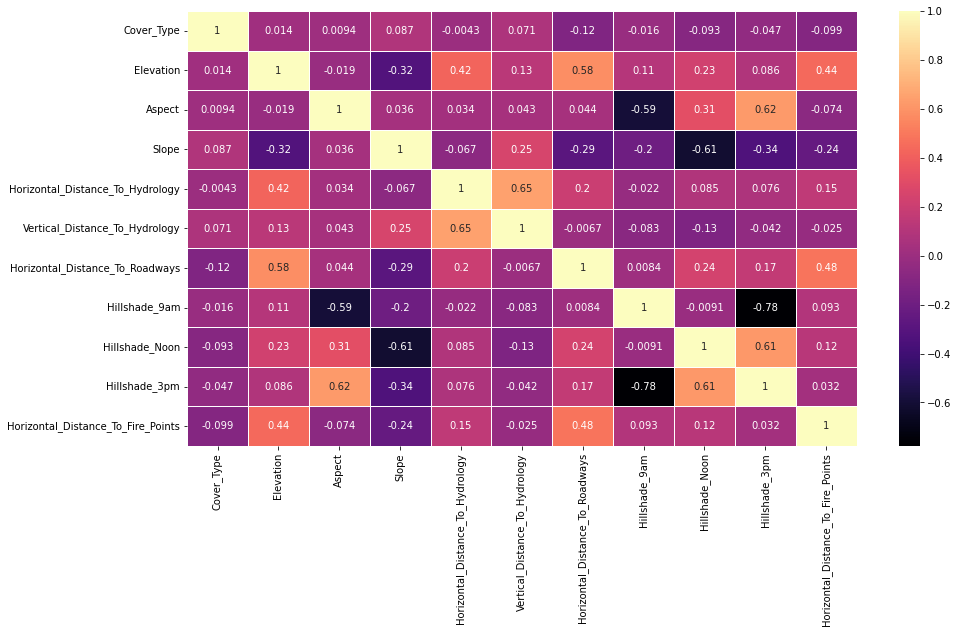

In [13]:
#Continuous features 
plt.figure(figsize=(15,8))
sns.heatmap(train_data[['Cover_Type'] + continuous_features.columns.values.tolist()].corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

<AxesSubplot:>

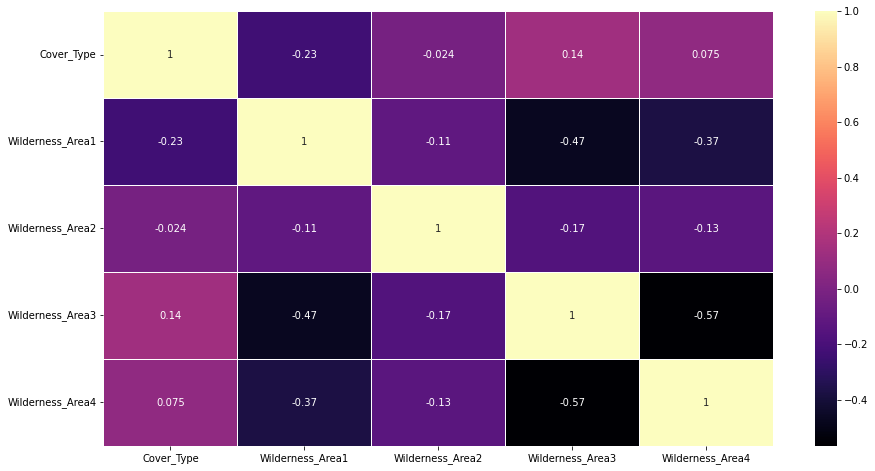

In [14]:
#Wilderness_features
plt.figure(figsize=(15,8))
sns.heatmap(train_data[['Cover_Type'] + wilderness_features.columns.values.tolist()].corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

* We see that 'Hallshade_9am' is hightly correlated to others so we drop it

* We see that 'Wilderness_Area3' and 'Wilderness_Area4' are highly correlated, we might eliminate one of them at the end of the process. 


**There are too many binary features so I think that doing reverse one-hot encoding will probably improve the performance and at least we can do dimensional reduction on those binary features**

In [15]:
# Encode soil type ordinally
# Reverse one hot encoding for soil_type
def categorical_encoding(df):
    data = df.copy()
    data['Soil_Type'] = 0
    for i in range(1,41):
        data['Soil_Type'] += i*data[f'Soil_Type{i}']
    return data

In [16]:
# Encode soil type
train_data = categorical_encoding(train_data)

In [17]:
# Encode wilderness area ordinally
# Reverse one hot encoding for wilderness
def categorical_encoding_wilderness(df):
    data = df.copy()
    data['Wilderness_Area'] = 0
    for i in range(1,5):
        data['Wilderness_Area'] += i*data[f'Wilderness_Area{i}']
    return data

In [18]:
# Encode soil type
train_data = categorical_encoding_wilderness(train_data)

# Feature Engineering & Selection

## General Information

Soil Types: 1 to 40 : based on the USFS Ecological Landtype Units (ELUs) for this study area, where the ELU is comprised of four digits:

   1) First digit: climatic zone
   
   2) Second digit: geologic zones
   
So here, intuitively we can extract two new features from the soil_type  which are:

   - 'climatic zone'
   
   - 'geologic zone' 

In [19]:
# Mapping soil type to ELU code
# This help us to extract the climatic zone and geologic zone from the soil_type
ELU_CODE = {
    1:2702,2:2703,3:2704,4:2705,5:2706,6:2717,7:3501,8:3502,9:4201,
    10:4703,11:4704,12:4744,13:4758,14:5101,15:5151,16:6101,17:6102,
    18:6731,19:7101,20:7102,21:7103,22:7201,23:7202,24:7700,25:7701,
    26:7702,27:7709,28:7710,29:7745,30:7746,31:7755,32:7756,33:7757,
    34:7790,35:8703,36:8707,37:8708,38:8771,39:8772,40:8776
}

In [20]:
#This extract climatic zone of soil_type and add a new feature to our data
def climatic_zone(df):
    df = df.copy()
    df['Climatic_Zone'] = df['Soil_Type'].apply(
        lambda x: int(str(ELU_CODE[x])[0])
    )
    return df

In [21]:
#This extract geologic zone from soil_type and add a new feature to our data
def geologic_zone(df):
    df = df.copy()
    df['Geologic_Zone'] = df['Soil_Type'].apply(
        lambda x: int(str(ELU_CODE[x])[1])
    )
    return df

In [22]:
train_data = climatic_zone(train_data)
train_data = geologic_zone(train_data)

On top of that ELUs code, each soil_type has their description. For example, 
1: ELU 2702, Cathedral family - Rock outcrop complex, extremely stony.
We can see that it gives information about the type of surface that cover that area:

   - stony
   
   - very stony
   
   - extremely stony
   
   - rubbly
   
   - no_description (no_desc)
    
All of these type of surface extract from the last component of the description of each soil type

In [23]:
def surface_cover(df):
    # Group IDs
    # base on ELU code from soil_type
    no_desc = [7,8,14,15,16,17,19,20,21,23,35]
    stony = [6,12]
    very_stony = [2,9,18,26]
    extremely_stony = [1,22,24,25,27,28,29,30,31,32,33,34,36,37,38,39,40]
    rubbly = [3,4,5,10,11,13]
    
    # Create dictionary to your the type of surface
    surface_cover = {i:0 for i in no_desc}
    surface_cover.update({i:1 for i in stony})
    surface_cover.update({i:2 for i in very_stony})
    surface_cover.update({i:3 for i in extremely_stony})
    surface_cover.update({i:4 for i in rubbly})
    
    # Create Feature
    df_temp = df.copy()
    df_temp['Surface_Cover'] = df['Soil_Type'].apply(
        lambda x: surface_cover[x]
    )
    return df_temp

In [24]:
# Surface Cover
train_data = surface_cover(train_data)

* On top of surface cover, we can also extract the type of rock by combining the last two components of the description of 'soil_type'.

In [25]:
def rock_type(df):
    
    # Group IDs
    no_desc = [7,8,14,15,16,17,19,20,21,23,35]
    stones = [1,2,6,9,12,18,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40]
    boulders = [22]
    rubble = [3,4,5,10,11,13]

    # Create dictionary
    rock_size = {i:0 for i in no_desc}
    rock_size.update({i:1 for i in stones})
    rock_size.update({i:2 for i in boulders})
    rock_size.update({i:3 for i in rubble})
    
    df_temp = df.copy()
    df_temp['Rock_Size'] = df['Soil_Type'].apply(
        lambda x: rock_size[x]
    )
    return df_temp

In [26]:
# Surface Cover
train_data = rock_type(train_data)

**Wilderness Areas:**

   1) Rawah Wilderness Area

   2) Neota Wilderness Area

   3) Comanche Peak Wilderness Area
    
   4) Cache la Poudre Wilderness Area

   So, by doing linear combination between 'Wilderness_Area' and 'Climatic_Zone','Rock_Size','Surface_Cover', we can get new features that can possibly capture non-linear relatinships between features and the target variable.

In [27]:
def non_linear_relationship(data):
    df = data.copy()
        
    #  New Feature
    df['Climate_Area1'] = df['Wilderness_Area1']*df['Climatic_Zone'] 
    df['Climate_Area2'] = df['Wilderness_Area2']*df['Climatic_Zone'] 
    df['Climate_Area3'] = df['Wilderness_Area3']*df['Climatic_Zone'] 
    df['Climate_Area4'] = df['Wilderness_Area4']*df['Climatic_Zone'] 
    df['Rock_Area1'] = df['Wilderness_Area1']*df['Rock_Size']
    df['Rock_Area2'] = df['Wilderness_Area2']*df['Rock_Size']    
    df['Rock_Area3'] = df['Wilderness_Area3']*df['Rock_Size']  
    df['Rock_Area4'] = df['Wilderness_Area4']*df['Rock_Size']    
    df['Surface_Area1'] = df['Wilderness_Area1']*df['Surface_Cover'] 
    df['Surface_Area2'] = df['Wilderness_Area2']*df['Surface_Cover'] 
    df['Surface_Area3'] = df['Wilderness_Area3']*df['Surface_Cover'] 
    df['Surface_Area4'] = df['Wilderness_Area4']*df['Surface_Cover'] 
    
    return df

In [28]:
train_data = non_linear_relationship(train_data)

**Linear Combination of continuous features** 

   Linear combinations of features can improve the performance of a machine learning model in some cases because they can capture non-linear relationships between the features and the target variable.

In [29]:
def new_features(data):
    df = data.copy()
    df['linear_EleVert1'] = abs(df['Elevation'] - df['Vertical_Distance_To_Hydrology'])
    df['linear_EleVert2'] = abs(df['Elevation'] + df['Vertical_Distance_To_Hydrology'])
    df['linear_HydroFire1'] = abs(df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Fire_Points'])
    df['linear_HydroFire2'] = abs(df['Horizontal_Distance_To_Hydrology'] - df['Horizontal_Distance_To_Fire_Points'])
    df['linear_HydroRoad1'] = abs(df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Roadways'])
    df['linear_HydroRoad2'] = abs(df['Horizontal_Distance_To_Hydrology'] - df['Horizontal_Distance_To_Roadways'])
    df['linear_FireRoad1'] = abs(df['Horizontal_Distance_To_Fire_Points'] + df['Horizontal_Distance_To_Roadways'])
    df['linear_FireRoad2'] = abs(df['Horizontal_Distance_To_Fire_Points'] - df['Horizontal_Distance_To_Roadways'])
    df['linear_meanHorizon'] = (df['Horizontal_Distance_To_Roadways']  + df['Horizontal_Distance_To_Fire_Points'] + df['Horizontal_Distance_To_Hydrology'])/3
    df['linear_RoadEle1'] = df['Elevation'] + df['Horizontal_Distance_To_Roadways']
    df['linear_RoadEle2'] = abs(df['Elevation'] - df['Horizontal_Distance_To_Roadways'])
    df['linear_EleHor1'] = abs(df['Elevation'] + df['Horizontal_Distance_To_Fire_Points'])
    df['linear_EleHor2'] = abs(df['Elevation'] - df['Horizontal_Distance_To_Fire_Points'])
    df['Combination_RoadEle'] = df['Horizontal_Distance_To_Roadways'] * df['Elevation']
    df['Combination_FireEle'] = df['Horizontal_Distance_To_Fire_Points'] * df['Elevation']
    df['Combination_HydroEle'] = df['Horizontal_Distance_To_Hydrology'] * df['Elevation']
    df['Combination_VertEle'] = abs(df['Vertical_Distance_To_Hydrology'] * df['Elevation'])
    
    return df

In [30]:
# misc feature engineering
train_data = new_features(train_data)

* After doing reverse one-hot encoding and extract all useful information from 'soil_type', we can drop it(dimensional reduction because there are two many soil_type).

In [31]:
train_data.drop(columns = soil_features, inplace = True)

### Alternative of Dimensional Reduction

In [32]:
labels_training = train_data['Cover_Type']

##### 1) Feature selection using ANOVA or Chi-squared

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, labels_training, test_size=0.2, random_state=42)

In [34]:
# Feature Selection using ANOVA 
# Alternative we can use chi2 but chi2 doesn't allow us to pass the non-negative value.
from sklearn.feature_selection import SelectKBest, f_classif

#select 30 most important features
selector = SelectKBest(f_classif, k=30)
X_selected = selector.fit_transform(X_train.drop(['Id'],axis=1), y_train)

# Get the names of the selected features
feature_names = [X_train.drop(['Id'],axis=1).columns.values[i] for i in selector.get_support(indices=True)]
print(f"Selected features: {feature_names}")

Selected features: ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area4', 'Cover_Type', 'Soil_Type', 'Wilderness_Area', 'Climatic_Zone', 'Rock_Size', 'Climate_Area1', 'Climate_Area3', 'Climate_Area4', 'Rock_Area1', 'Rock_Area4', 'Surface_Area1', 'Surface_Area4', 'linear_EleVert1', 'linear_EleVert2', 'linear_HydroFire1', 'linear_HydroFire2', 'linear_HydroRoad1', 'linear_HydroRoad2', 'linear_FireRoad1', 'linear_meanHorizon', 'linear_RoadEle1', 'linear_EleHor1', 'Combination_RoadEle', 'Combination_FireEle', 'Combination_HydroEle']


In [39]:
# Show the sorted list of f-values for each features
# Compute the ANOVA F-value for each feature
f_values, p_values = f_classif(X_train.drop(['Id'],axis=1), y_train)

# Sort the features based on their F-value
sorted_indices = np.argsort(f_values)[::-1]
# print(sorted_indices)
# I commented this in order to shorted the pdf
# Print the sorted F-values and feature names
for i in sorted_indices:
    print(i,f"{X_train.drop(['Id'],axis=1).columns.values[i]}: {f_values[i]:.3f}")

14 Cover_Type: inf
0 Elevation: 13141.225
33 linear_EleVert1: 12616.765
34 linear_EleVert2: 10358.501
15 Soil_Type: 5192.002
17 Climatic_Zone: 4167.754
13 Wilderness_Area4: 3997.229
16 Wilderness_Area: 2339.319
24 Climate_Area4: 2160.668
42 linear_RoadEle1: 2059.651
44 linear_EleHor1: 1666.767
32 Surface_Area4: 1533.081
28 Rock_Area4: 1440.904
46 Combination_RoadEle: 1412.617
41 linear_meanHorizon: 1340.118
39 linear_FireRoad1: 1222.717
37 linear_HydroRoad1: 1170.103
5 Horizontal_Distance_To_Roadways: 1016.287
47 Combination_FireEle: 966.701
38 linear_HydroRoad2: 828.123
35 linear_HydroFire1: 752.061
10 Wilderness_Area1: 723.548
21 Climate_Area1: 663.532
20 Rock_Size: 660.496
9 Horizontal_Distance_To_Fire_Points: 615.408
23 Climate_Area3: 581.097
25 Rock_Area1: 543.686
29 Surface_Area1: 515.552
48 Combination_HydroEle: 514.111
36 linear_HydroFire2: 466.736
40 linear_FireRoad2: 464.770
12 Wilderness_Area3: 354.932
6 Hillshade_9am: 317.234
3 Horizontal_Distance_To_Hydrology: 310.138
2 Sl

We can drop the features that has small F-value which improve the performance of our model.

##### 2) Using PCA to do the dimensional reduction

Before performing PCA, we need to do standard scaler to our data because PCA is affected by scale because it is based on the variance of the features in the dataset.

In [36]:
# Select the features
X = train_data.drop(columns='Cover_Type')

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler object to the data
scaler.fit(X)

# Transform the data using the StandardScaler object
X_scaled = scaler.transform(X)

# Create a PCA object with n_components=30
# Here we can choose the number of components 
pca = PCA(n_components=30)

#Or using n_components = 0.95 (for 95% captures of variance)
# #Compute the cumulative sum of the variance ratios
# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# #Find the number of components that explain 95% of the variance
# n_components = np.argmax(cumulative_variance >= 0.95) + 1

#Fit the PCA object to the scaled data
pca.fit(X_scaled)

#Transform the scaled data using the PCA object
X_pca = pca.transform(X_scaled)

* I will use none of these methods, because they doesn't improve the performance and I prefer to elimate the features by hand.

## Models Comparison

In [36]:
X_train = X_train.drop(['Cover_Type'],axis=1)
X_valid = X_valid.drop(['Cover_Type'],axis=1)

In [37]:
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)

Training Data Shape: (12096, 50)
Validation Data Shape: (3024, 50)


In [38]:
print('Training Label Shape:', y_train.shape)
print('Validation Label Shape:', y_valid.shape)

Training Label Shape: (12096,)
Validation Label Shape: (3024,)


### Model that we are going to use

   1) K-Nearest Neighbors Classifier
   
   2) Decision Tree Classifier
   
   3) Random Forest Classifier
    
   4) Extra Trees (Random Forests) Classifier
   
   5) Support Vector Machine Classifier
   
   6) Extreme Gradient Boosting (XGBoost) Classifier
   
   7) Naive Bayes Classifier
   
   8) Neural Network Classifier 
   
   and compare the results on accuracy score. Then I will select the best model with the highest accuracy score for use.

### Compare model with scaled data set 

* Some models of machine learning will produce the correct result only in case of the data is centered and has unit variance. 

In [39]:
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train.drop(['Id'],axis=1), y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid.drop(['Id'],axis=1))

In [40]:
#Compare all classifier 
# --------------------
#Fit models
#knn
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled,y_train)
#decision tree
decision_clf = DecisionTreeClassifier()
decision_clf.fit(X_train_scaled,y_train)
#random forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_scaled,y_train)
#XGB
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_scaled,y_train)
#Tree
xrf_clf = ExtraTreesClassifier()
xrf_clf.fit(X_train_scaled,y_train)
#SVM 
svm_clf = SVC()
svm_clf.fit(X_train_scaled,y_train)
#naive bayes
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train_scaled,y_train)
#NN
nn_clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
nn_clf.fit(X_train_scaled,y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

In [41]:
#Error of each model, here we use mean absolute error
models= [('knn_classifier', knn_classifier),('decision tree', decision_clf), ('random forest', forest_clf), ('XGB', xgb_clf),('ExtraTree', xrf_clf),
        ('SVM', svm_clf),('Naive Bayes', gaussian_clf),('Neural Network', nn_clf)]
for i, model in models:    
    predictions = model.predict(X_valid_scaled)
    accuracy = metrics.accuracy_score(y_valid, predictions)
    print('Accuracy  of ', i , 'is: ',accuracy)
    print('Cross Validation Score of ', i , 'is : ' ,cross_val_score(model, X_valid_scaled, y_valid, cv=5).mean())

Accuracy  of  knn_classifier is:  0.8128306878306878
Cross Validation Score of  knn_classifier is :  0.6980794701986754
Accuracy  of  decision tree is:  0.7953042328042328
Cross Validation Score of  decision tree is :  0.7182589896557385
Accuracy  of  random forest is:  0.8895502645502645
Cross Validation Score of  random forest is :  0.8128323572875047
Accuracy  of  XGB is:  0.78505291005291
Cross Validation Score of  XGB is :  0.7612429533139949
Accuracy  of  ExtraTree is:  0.9031084656084656
Cross Validation Score of  ExtraTree is :  0.8124963056209294
Accuracy  of  SVM is:  0.7728174603174603
Cross Validation Score of  SVM is :  0.7248722018499261
Accuracy  of  Naive Bayes is:  0.48578042328042326
Cross Validation Score of  Naive Bayes is :  0.48115045700837394
Accuracy  of  Neural Network is:  0.8382936507936508
Cross Validation Score of  Neural Network is :  0.7592622188167041


##### Result
   We see that the ExtraTree gives the best performance which has accuracy 0.8935 with CV Score : 0.81(5-Fold). 

### Compare model with normal data set

* Some machine learning model doesn't care about the scale of the data such as the model which build with tree.

In [42]:
#Compare all classifier 
# --------------------
#Fit models
#knn
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train.drop(['Id'],axis=1),y_train)
#decision tree
decision_clf = DecisionTreeClassifier()
decision_clf.fit(X_train.drop(['Id'],axis=1),y_train)
#random forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train.drop(['Id'],axis=1),y_train)
#XGB
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train.drop(['Id'],axis=1),y_train)
#Tree
xrf_clf = ExtraTreesClassifier()
xrf_clf.fit(X_train.drop(['Id'],axis=1),y_train)
#SVM 
svm_clf = SVC()
svm_clf.fit(X_train.drop(['Id'],axis=1),y_train)
#naive bayes
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train.drop(['Id'],axis=1),y_train)
#NN
nn_clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
nn_clf.fit(X_train.drop(['Id'],axis=1), y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

In [43]:
#Error of each model, here we use mean absolute error
models= [('knn_classifier', knn_classifier), ('random forest', forest_clf), ('XGB', xgb_clf),('ExtraTree', xrf_clf),
        ('SVM', svm_clf),('Naive Bayes', gaussian_clf),('Neural Network', nn_clf)]
for i, model in models:    
    predictions = model.predict(X_valid.drop(['Id'],axis=1))
    accuracy = metrics.accuracy_score(y_valid, predictions)
    print('Accuracy  of ', i , 'is: ',accuracy)
    print('Cross Validation Score of ', i , 'is : ' ,cross_val_score(model, X_valid.drop(['Id'],axis=1), y_valid, cv=5).mean())

Accuracy  of  knn_classifier is:  0.6121031746031746
Cross Validation Score of  knn_classifier is :  0.4672590443872804
Accuracy  of  random forest is:  0.8908730158730159
Cross Validation Score of  random forest is :  0.8115111378687537
Accuracy  of  XGB is:  0.78505291005291
Cross Validation Score of  XGB is :  0.7612429533139949
Accuracy  of  ExtraTree is:  0.9031084656084656
Cross Validation Score of  ExtraTree is :  0.8128257895024902
Accuracy  of  SVM is:  0.4212962962962963
Cross Validation Score of  SVM is :  0.38525477532702096
Accuracy  of  Naive Bayes is:  0.49007936507936506
Cross Validation Score of  Naive Bayes is :  0.4933895243829019
Accuracy  of  Neural Network is:  0.21726190476190477
Cross Validation Score of  Neural Network is :  0.23612391221060697


##### Result

   We see that ExtraTree still give the best performance with the non-scaled data. But the other models give poor accuracy, for example:
    
   - KNN : this is because KNN uses a distance measure, such as Euclidean distance, to find the nearest neighbors of a sample. If the data is not scaled, the features with larger scales may dominate the distance measure, and the algorithm may produce poor results.
   
   - SVM : If the data is not scaled, the features with larger scales may dominate the distance measure used by the SVM, and the algorithm may produce poor results.
   
   - NN : It learns by adjusting the weights of the connections between the nodes based on the input data. If the data is not scaled, the features with larger scales may dominate the input to the neural network.



### Model Choice 
    
   We will choose ExtraTreeClassifier as our final model.

   We can see the features importants which train this model

In [44]:
#create list of features
features = list(X_train.drop(['Id'],axis=1).columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': features, 
                                'importance': xrf_clf.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)
feature_results[0:10]

,feature,importance
0,linear_EleVert1,0.08
1,Elevation,0.07
2,Soil_Type,0.07
3,Climatic_Zone,0.06
4,linear_EleVert2,0.05
5,Wilderness_Area4,0.03
6,linear_RoadEle1,0.03
7,Combination_RoadEle,0.03
8,Hillshade_9am,0.03
9,Climate_Area3,0.02


# Perform Hyperparameter Tuning on the Best Model

## Extra Trees Classifier

   The model with default parameters gives us a good performance on training set, but it might be too complex or produce overfitting on the overall dataset, so doing hyperparameter tunning can avoid or reduce overfitting of our model.
    
   There are two way of doing hyperparameter tuning, there is RandomizedSearchCV and GridSearchCV.
   
   Here I used GridSearchCV because the ExtraTreesClassifier has a good performance in term of execution time, so I will train all combination of paramters.

In [45]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [100, 300, 500]

max_depth = [None,10, 20, 30]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split
                       }

In [46]:
# create model
best_model = ExtraTreesClassifier()

# Create the randomized search CV object
grid_search = GridSearchCV(best_model, param_grid = hyperparameter_grid, cv = 5, scoring = 'accuracy', verbose = 1,
                               n_jobs = -1, return_train_score = True)

In [47]:
# Fit on the all training data using random search object
grid_search.fit(X_train.drop(['Id'],axis=1), y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'n_estimators': [100, 300, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [48]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [49]:
grid_search.best_estimator_.fit(X_train.drop(['Id'],axis=1),y_train)

ExtraTreesClassifier(min_samples_split=3, n_estimators=300)

In [50]:
y_pred = grid_search.best_estimator_.predict(X_valid.drop(['Id'], axis=1))
accuracy = metrics.accuracy_score(y_valid, y_pred)
print('Accuracy of tunning model is', accuracy)
print('Cross Validation Score of tuning model is : ' ,cross_val_score(grid_search.best_estimator_, X_valid.drop(['Id'],axis=1), y_valid, cv=5).mean())

Accuracy of tunning model is 0.9014550264550265
Cross Validation Score of tuning model is :  0.8121668217393685


*Before tunning*
    
   - Accuracy: 0.903
   
   - CV Score: 0.812
   
*After tunning*

   - Accuracy: 0.901
   
   - CV Score: 0.812
 
 
We see that the accuracy of the model doesn't change much, but this can avoid the overfitting on the overall dataset.

**Confusion Matrix**

In [51]:
# create set of y_predictions
y_predicted = grid_search.best_estimator_.predict(X_valid.drop(['Id'],axis=1))

In [52]:
confusion_matrix(y_valid,y_predicted)

array([[360,  48,   0,   0,   9,   0,  10],
       [ 65, 355,   7,   0,  22,  12,   3],
       [  0,   0, 352,  16,   4,  28,   0],
       [  0,   0,   5, 427,   0,   4,   0],
       [  0,   8,   2,   0, 438,   3,   1],
       [  0,   1,  25,  10,   1, 378,   0],
       [ 14,   0,   0,   0,   0,   0, 416]])

In [53]:
y_valid.value_counts()

2    464
5    452
4    436
7    430
1    427
6    415
3    400
Name: Cover_Type, dtype: int64

*We see that our model predict the cover type 3 4 5 6 7 well, but for the cover type 1 2, it is a bit confuse.*

# Evaluate the Best Model with Test Data

In [54]:
full_test = pd.read_csv('../map553-2022/test-full.csv')

In [55]:
full_test = categorical_encoding(full_test)
full_test = categorical_encoding_wilderness(full_test)

In [56]:
full_test = climatic_zone(full_test)
full_test = geologic_zone(full_test)

In [57]:
full_test = surface_cover(full_test)

In [58]:
full_test = rock_type(full_test)

In [59]:
full_test = non_linear_relationship(full_test)

In [60]:
full_test = new_features(full_test)

In [61]:
full_test.drop(columns = soil_features, inplace = True)

   Make sure of the test data shape and there aren't any missing values

In [62]:
print('Test Data Shape:', full_test.shape)

Test Data Shape: (581012, 50)


In [63]:
# #I commented this in order to shorten the pdf
# full_test.info()

In [69]:
# fit the best estimator
grid_search.best_estimator_.fit(train_data.drop(['Id'],axis=1).drop(['Cover_Type'],axis=1), train_data['Cover_Type'])

ExtraTreesClassifier(min_samples_split=3, n_estimators=300)

In [70]:
y_pred = grid_search.best_estimator_.predict(full_test.drop(['Id'], axis=1))
# y_pred = clf.predict(full_test.drop(['Id'], axis=1))
y_pred = [int(value) if value >= 0 else 0 for value in y_pred]
# Dump the results into a file that follows the required Kaggle template
with open("submit.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["Id", "Cover_Type"])
    for index, prediction in enumerate(y_pred):
        writer.writerow([str(full_test['Id'].iloc[index]) , str(int(prediction))])

### Kaggle Result

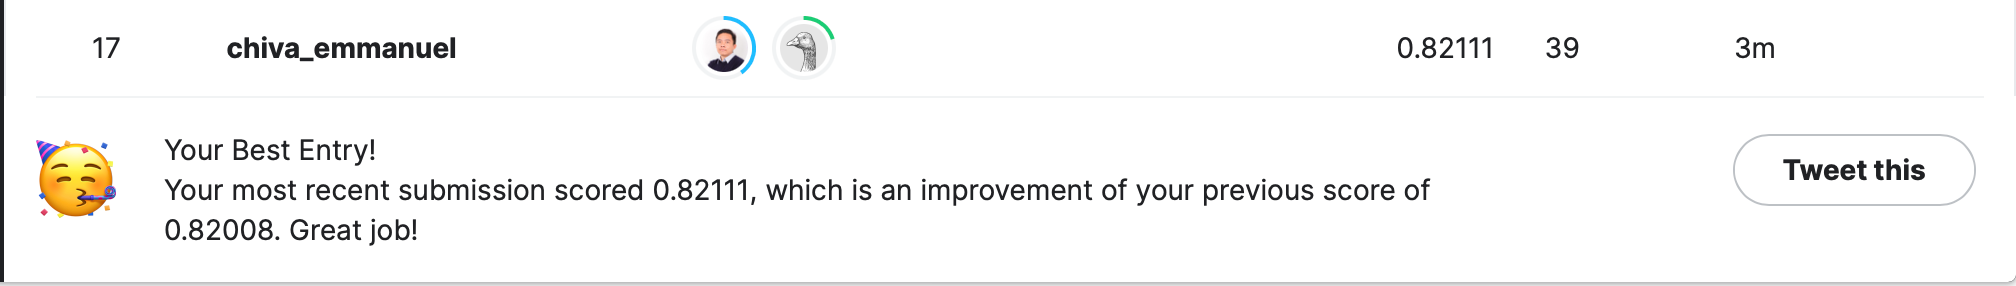

In [1]:
from IPython.display import Image
Image(filename='result1.png') 